<a href="https://colab.research.google.com/github/vmjs1234/CLUSTERING_ASSIGNMENT/blob/main/f_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Install necessary libraries
!pip install yfinance pandas scikit-learn matplotlib seaborn


In [16]:

# Increased number of tickers and expanded time range
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "META", "NFLX", "PYPL", "ADBE"]
data = yf.download(tickers, start="2012-01-01", end="2023-12-31")["Close"]

# Step 2: Feature engineering for clustering
returns = data.pct_change().dropna()
volatility = returns.rolling(window=30).std().dropna()


[*********************100%***********************]  10 of 10 completed


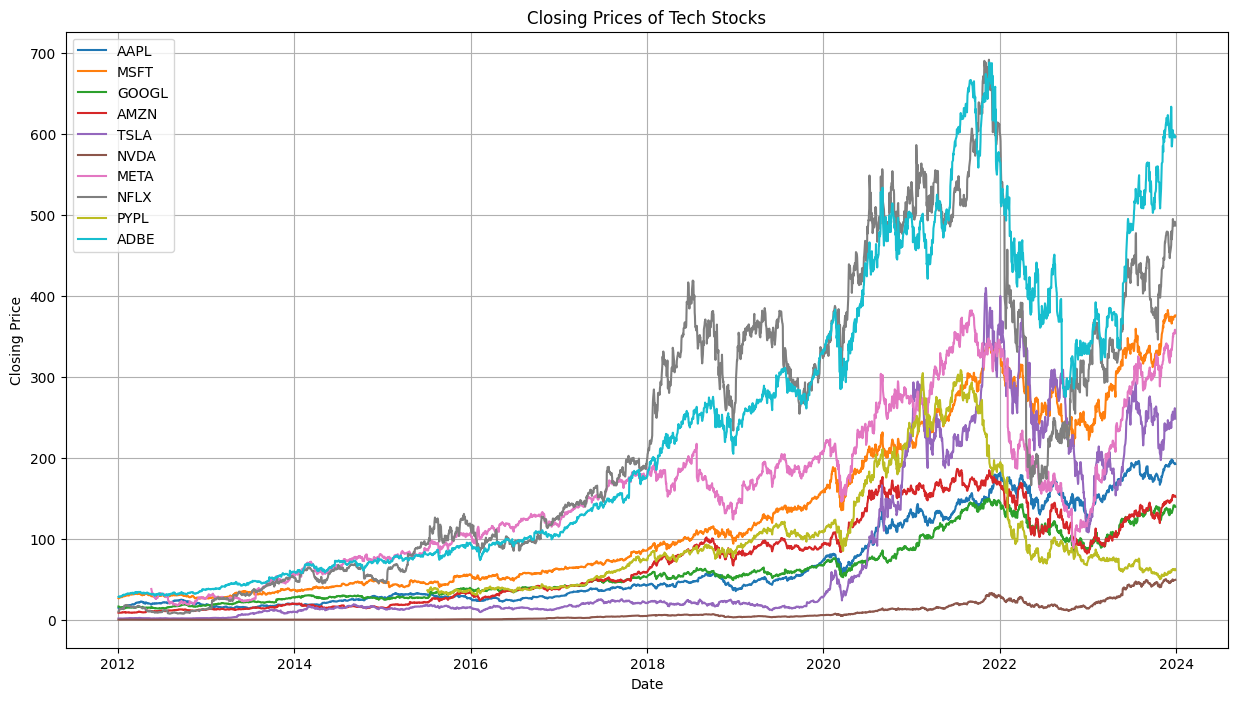

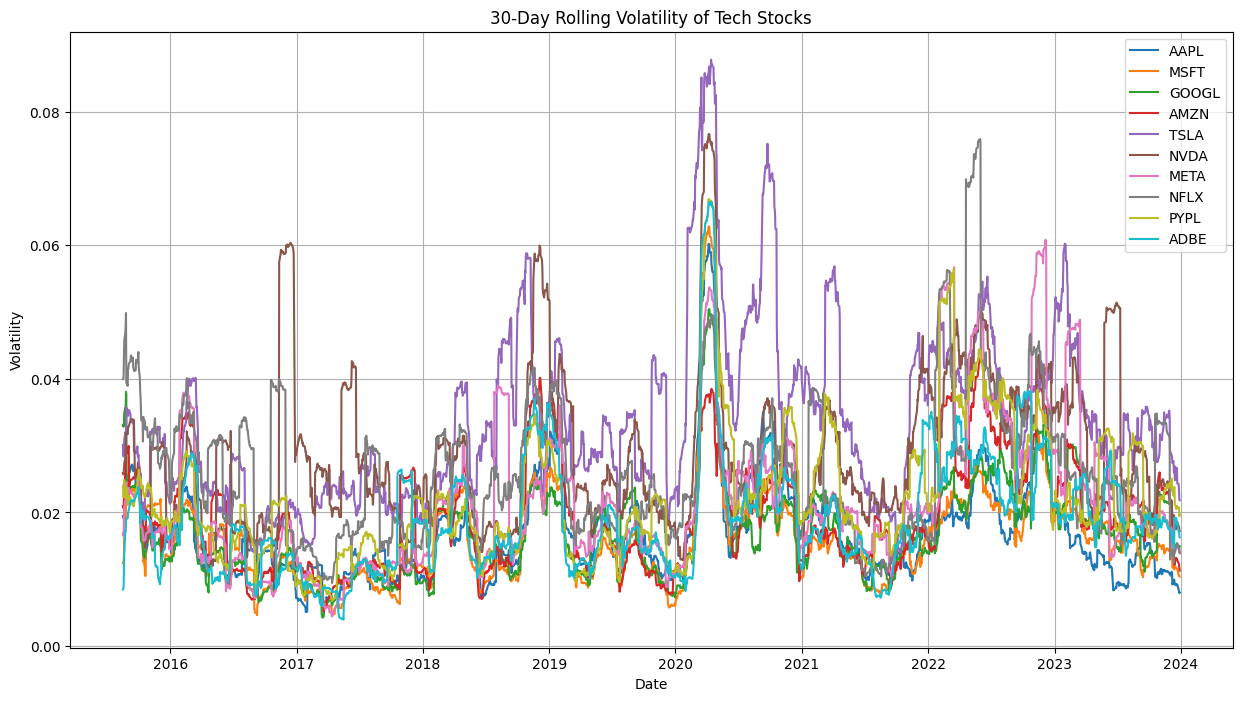

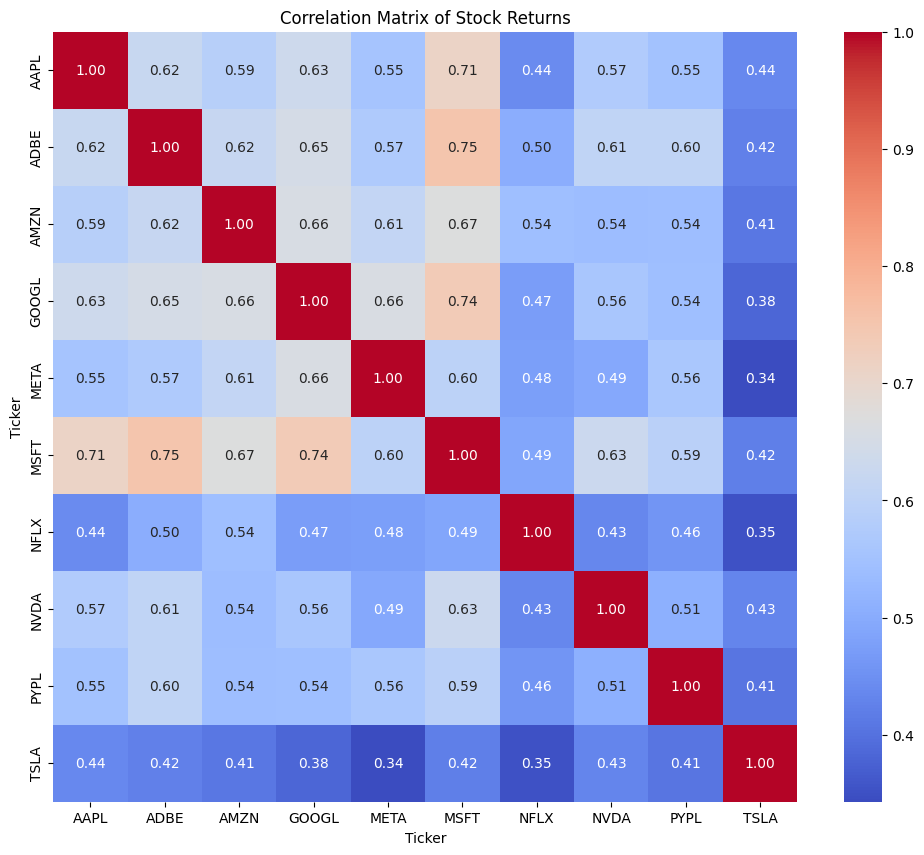

In [17]:
# prompt: Please add few visualization

import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

# Step 3: Data Visualization

# Plotting closing prices
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)
plt.title("Closing Prices of Tech Stocks")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()


# Visualize volatility
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(volatility.index, volatility[ticker], label=ticker)
plt.title("30-Day Rolling Volatility of Tech Stocks")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()


# Correlation Heatmap
correlation_matrix = returns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Returns')
plt.show()

In [18]:

# Additional features: rolling mean of returns and volatility
returns_rolling_mean = returns.rolling(window=10).mean().dropna()
volatility_rolling_mean = volatility.rolling(window=10).mean().dropna()


In [19]:

# Combine features into a single DataFrame
features = pd.concat([returns.mean(), volatility.mean(), returns_rolling_mean.mean(), volatility_rolling_mean.mean()], axis=1)
features.columns = ["Average_Return", "Average_Volatility", "Rolling_Mean_Return", "Rolling_Mean_Volatility"]


In [20]:

# Step 3: Preprocess the data (scaling)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


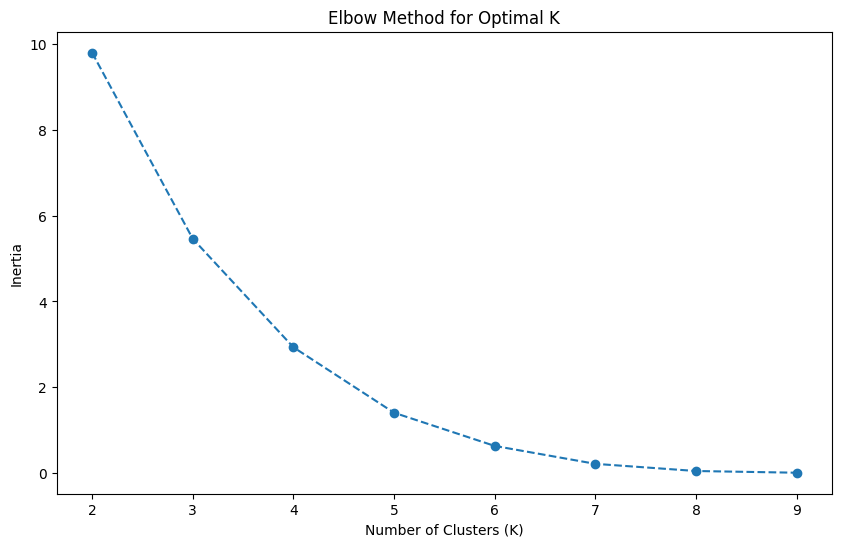

In [21]:

# Step 4: Apply K-Means clustering
inertia = []
k_values = range(2, 10) # Increased range for k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Increased n_init
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


In [22]:

# Optimal k might change due to more data, re-evaluate elbow curve
optimal_k = 4  # Example: adjust based on new elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

features["Cluster"] = clusters


In [23]:

# Step 5: Evaluate clustering quality
silhouette_avg = silhouette_score(scaled_features, clusters)
davies_bouldin_avg = davies_bouldin_score(scaled_features, clusters)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.2f}")



Silhouette Score: 0.36
Davies-Bouldin Score: 0.49


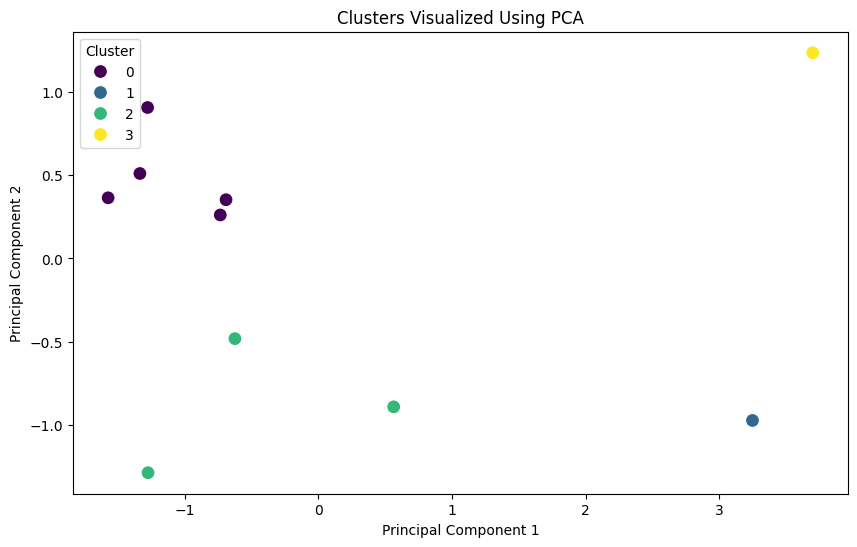

In [24]:

# Step 6: Visualize clustering results (PCA for dimensionality reduction)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette="viridis", s=100)
plt.title("Clusters Visualized Using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()